In [1]:
from fastai.vision.all import *
import numpy as np
from PIL import Image
from pathlib import Path
import re

In [2]:
folder = Path('Scans')
laterals = {d.name for d in folder.glob('*/*') if d.is_dir() and "lat" in d.name.lower()}
laterals

{'Lateral', 'Lateral Ceph', 'Lateral Skull', 'LateralCeph', 'Laterals'}

In [3]:
files = folder.rglob("*.png")
scans = []
for f in files:
    if any([s in str(f) for s in laterals]):
        scans.append(f)

In [4]:
len(scans)

2712

In [5]:
def label_func(f):
    match = re.search(r'_(.*?)\.png', f)
    return match.group(1)

learn = load_learner("Resnet18_fp16")

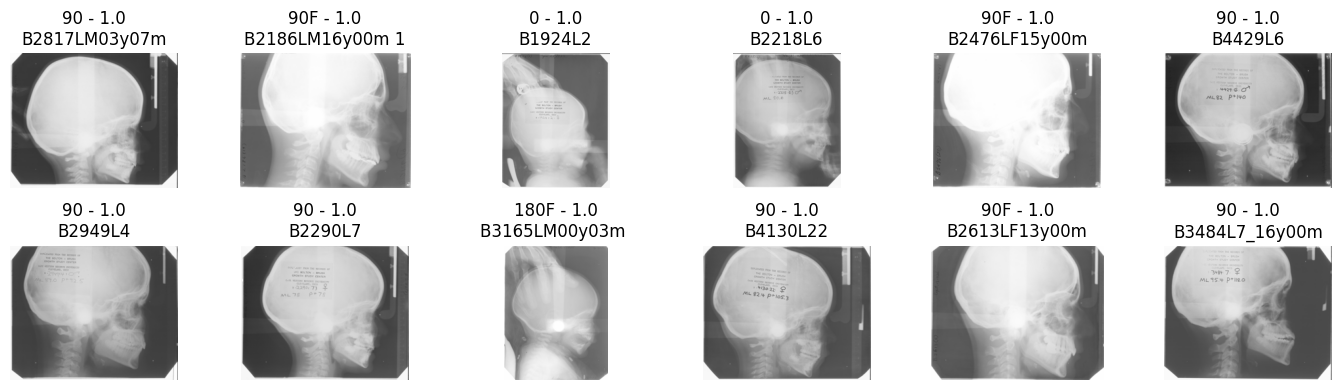

In [20]:
grid_x = 6
grid_y = 2

sample_images = random.sample(scans, grid_x * grid_y)

# Initialize a new plot
fig, axs = plt.subplots(grid_y, grid_x, figsize=(14, 4))

# Open and display each image
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)
    img.thumbnail((256,256))
    # pred = learn.predict(img_path)
    pred_class, pred_idx, outputs = learn.predict(img_path)
    label = str(pred_class)
    confidence = float(outputs[pred_idx])
    
    match label:
        case "0F":
            img = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
        case "90":
            img = img.transpose(Image.Transpose.ROTATE_270)
        case "270":
            img = img.transpose(Image.Transpose.ROTATE_90)
        case "180":
            img = img.transpose(Image.Transpose.ROTATE_180)
        case "90F":
            img = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
            img = img.transpose(Image.Transpose.ROTATE_270)
        case "180F":
            img = img.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
        case "270F":
            img = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
            img = img.transpose(Image.Transpose.ROTATE_90)
    
    ax = axs[i // grid_x, i % grid_x]
    ax.imshow(img)
    ax.set_title(f"{label} - {confidence:.1f}\n{img_path.stem}")
    ax.axis('off')

plt.tight_layout()